In [7]:
import pymysql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

db = pymysql.connect(host='localhost', 
                     port=3306, 
                     user='root', 
                     passwd='3306', 
                     db = 'progammers_da', 
                     charset='utf8')


cursor = db.cursor()

# 필요 리스트, set함수 생성
year_month = set()
gender = set()
sum = []

# 년월, 성별, 성별당 판매량 추출
sql = """SELECT date_format(InvoiceDate, '%y-%m') as month, 
case when Product like 'Men%' then 'Men'
when Product like 'Women%' then 'Women'
end as gender,
avg(UnitsSold) FROM adidas
 group by 1, 2 
 order by month, gender;"""
cursor.execute(sql)

# 판매량 저장
for line in cursor:
    year_month.add(line[0])
    gender.add(line[1])
    sum.append(int(line[2]))
    

In [8]:
# 판매량의 1차원 배열을 년월 기준으로 2차원 배열로 재구성
np_sum = np.array(sum)
np_sum = np_sum.reshape(len(sum) // 2, 2)


In [9]:
# set 함수 리스트로 변환
list_year_month = list(year_month)
list_year_month.sort()

list_gender = list(gender)
list_gender.sort()


In [10]:
# 2차원 배열을 데이터프레임으로 변환
df = pd.DataFrame(np_sum, columns=['Men', 'Women'], index=list_year_month)


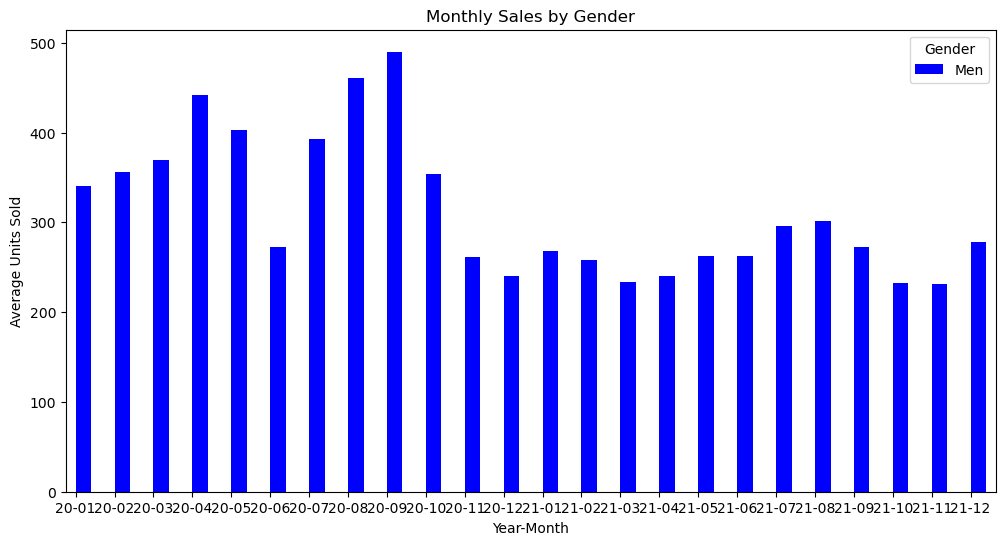

In [11]:
# 남성 그래프
df['Men'].plot(kind='bar', figsize=(12, 6), color='blue', position=0, width=0.4, label='Men')
plt.title('Monthly Sales by Gender')
plt.xlabel('Year-Month')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=0)  # 년월을 가로로 표시
plt.legend(title='Gender')


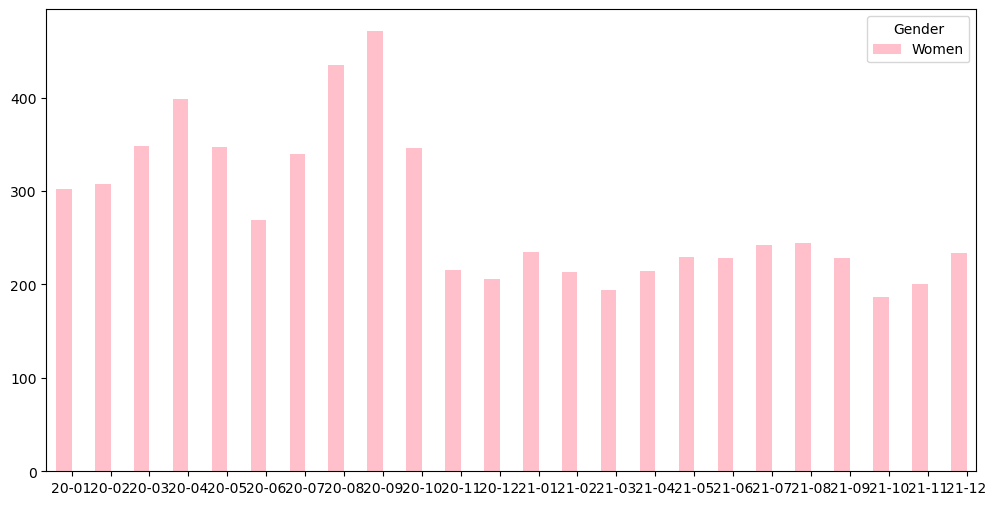

In [12]:
# 여성 그래프
df['Women'].plot(kind='bar', figsize=(12, 6), color='pink', position=1, width=0.4, label='Women')
plt.xticks(rotation=0)  # 년월을 가로로 표시
plt.legend(title='Gender')


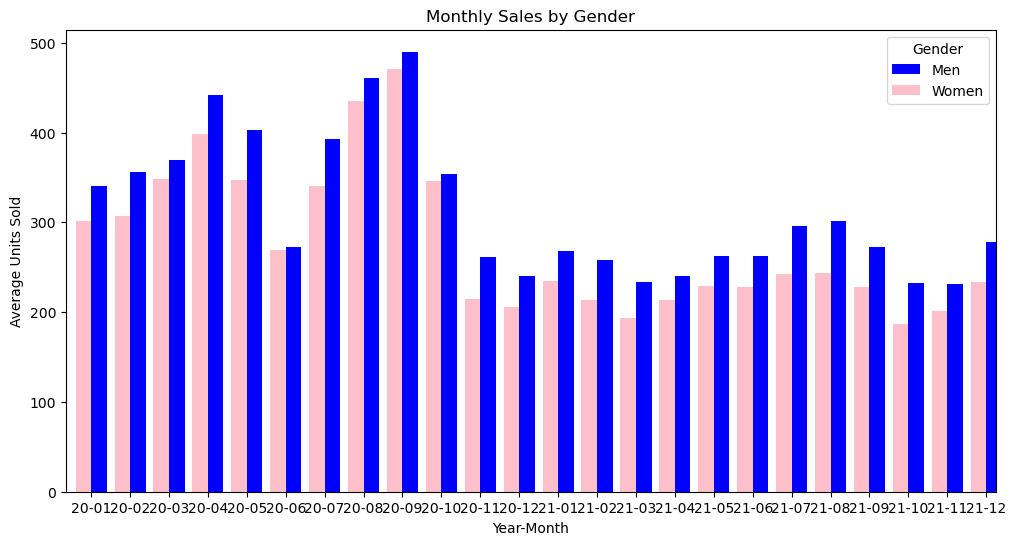

In [15]:
# 남여 그래프
df['Men'].plot(kind='bar', figsize=(12, 6), color='blue', position=0, width=0.4, label='Men')
plt.title('Monthly Sales by Gender')
plt.xlabel('Year-Month')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=0)  # 년월을 가로로 표시
plt.legend(title='Gender')

df['Women'].plot(kind='bar', figsize=(12, 6), color='pink', position=1, width=0.4, label='Women')
plt.xticks(rotation=0)  # 년월을 가로로 표시
plt.legend(title='Gender')

# 그래프 표시
plt.show()
